In [1]:
import wandb
api = wandb.Api()


In [36]:
run = api.run("mwcoleman/ft-mimic-image/2506m83h")

In [37]:
run.id
run.project

'ft-mimic-image'

In [4]:
artifact = api.artifact('ft-mimic-image/run-3fmpmwv4-labels_table:v0')
artifact.name

'run-3fmpmwv4-labels_table:v0'

In [5]:
# run.use_artifact(artifact)['data_table']

In [6]:
artifact.download(os.getcwd())

'/home/matt/Coding/research/mmRad/analysis'

In [47]:
entity, project = "mwcoleman", "ft-mimic-image"
runs = api.runs(entity + "/" + project)


In [48]:
runs[0].name

'wwm-mfr-itm_95'

In [51]:
mykeys = [k for k in runs[0].summary.keys() if k in keys]

In [57]:
import pandas as pd

In [61]:
keys = ['Avg_AUC', 'wAvg_AUC']
run_filter = '_95'
runs = wandb.Api().runs(entity+'/'+project)
runs = [r for r in runs if run_filter in r.name] if run_filter is not None else runs

summary_list, name_list = [],[]
for run in runs:
    run_summary = {k:v for k,v in run.summary.items() if k in keys}
    summary_list.append(run_summary)
    name_list 

    name_list.append(run.name)

runs_df = pd.DataFrame({
    
    "name":name_list
})
    
for key in keys:
    runs_df[key]=[r[key] for r in summary_list]
runs_df.round(3)

name  Avg_AUC  wAvg_AUC
0                wwm-mfr-itm_95    0.799     0.822
1                    wwm-mfr_95    0.749     0.780
2                    sbm-mfr_95    0.749     0.781
3                        sbm_95    0.704     0.734
4                     pc-mlm_95    0.658     0.701
5                         pc_95    0.625     0.663
6   mlm-mfr-itm-from_scratch_95    0.769     0.789
7                mlm-mfr-itm_95    0.799     0.822
8                    mlm-mfr_95    0.736     0.774
9                    mlm-itm_95    0.754     0.785
10                       mlm_95    0.656     0.696
11                       mfr_95    0.777     0.802
12                       itm_95    0.801     0.833
13                   scratch_95    0.738     0.764
14                     vbert_95    0.717     0.746

In [64]:

def get_summary_df(entity,project,keys,run_filter=None):
    # Returns a dataframe with runs as rows and keys as cols
    runs = wandb.Api().runs(entity+'/'+project)
    runs = [r for r in runs if run_filter in r.name] if run_filter is not None else runs

    summary_list, name_list = [],[]
    for run in runs:
        run_summary = {k:v for k,v in run.summary.items() if k in keys}
        summary_list.append(run_summary)
        name_list 

        name_list.append(run.name)

    runs_df = pd.DataFrame({
        
        "name":name_list
    })
        
    for key in keys:
        runs_df[key]=[r[key] for r in summary_list]
    return runs_df.round(3)
    
keys = ['wAvg_AUC']
run_filter = '_95'
entity, project = "mwcoleman", "ft-mimic-image"

image_95_df = get_summary_df(entity,project,keys,run_filter)


In [65]:
image_95_df

name  wAvg_AUC
0                wwm-mfr-itm_95     0.822
1                    wwm-mfr_95     0.780
2                    sbm-mfr_95     0.781
3                        sbm_95     0.734
4                     pc-mlm_95     0.701
5                         pc_95     0.663
6   mlm-mfr-itm-from_scratch_95     0.789
7                mlm-mfr-itm_95     0.822
8                    mlm-mfr_95     0.774
9                    mlm-itm_95     0.785
10                       mlm_95     0.696
11                       mfr_95     0.802
12                       itm_95     0.833
13                   scratch_95     0.764
14                     vbert_95     0.746

In [68]:
'mfr' in image_95_df.name


False

<BarContainer object of 3 artists>

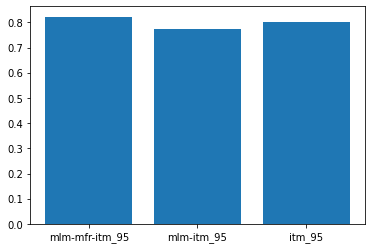

In [81]:
## Plot itm, mfr, sbm, wwm
import matplotlib.pyplot as plt

# Plot MFR w/wout others

mfr_95_df = image_95_df[image_95_df.name.str.contains('mfr') 
                         & ~image_95_df.name.str.contains('sbm')
                         & ~image_95_df.name.str.contains('scratch')
                         & ~image_95_df.name.str.contains('wwm')]

itm_95_df = image_95_df[image_95_df.name.str.contains('itm') 
                         & ~image_95_df.name.str.contains('sbm')
                         & ~image_95_df.name.str.contains('scratch')
                         & ~image_95_df.name.str.contains('wwm')]

fig,ax = plt.subplots()
mfr_95_df
ax.bar(itm_95_df.name, mfr_95_df.wAvg_AUC)

In [88]:
image_95_df

name  wAvg_AUC
0                wwm-mfr-itm_95     0.822
1                    wwm-mfr_95     0.780
2                    sbm-mfr_95     0.781
3                        sbm_95     0.734
4                     pc-mlm_95     0.701
5                         pc_95     0.663
6   mlm-mfr-itm-from_scratch_95     0.789
7                mlm-mfr-itm_95     0.822
8                    mlm-mfr_95     0.774
9                    mlm-itm_95     0.785
10                       mlm_95     0.696
11                       mfr_95     0.802
12                       itm_95     0.833
13                   scratch_95     0.764
14                     vbert_95     0.746

In [ ]:
labels = ['itm', 'mlm']
with_mlm = [0.785, 0.774]
wout_mlm = [0.833, 0.802]



In [92]:
itm_95 = image_95_df.iloc[[14,13,12,9]]

In [91]:
mfr_95 = image_95_df.iloc[[14,13,11,8]]

In [128]:
grouped_df = image_95_df.iloc[[12,11,9,8]]

In [130]:
grouped_df['name'] = ['itm','mfr','itm','mfr']

/tmp/ipykernel_78038/2779096705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df['name'] = ['itm','mfr','itm','mfr']


In [135]:
grouped_df

name  wAvg_AUC     mlm   Tasks
12  itm     0.833    +mlm  single
11  mfr     0.802    +mlm  single
9   itm     0.785  single    +mlm
8   mfr     0.774  single    +mlm

/tmp/ipykernel_78038/7878961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df['Tasks'] = ['No MLM', 'No MLM','W/ MLM','W/ MLM']


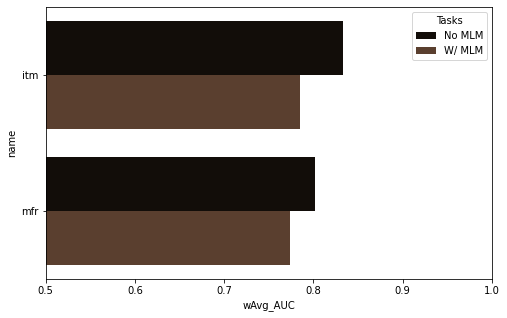

In [138]:
grouped_df['Tasks'] = ['No MLM', 'No MLM','W/ MLM','W/ MLM']

sns.barplot(y="name", x="wAvg_AUC", data=grouped_df, hue='Tasks', palette=colors)
plt.xlim((0.5,1))
plt.show()

In [93]:
itm_95

name  wAvg_AUC
14    vbert_95     0.746
13  scratch_95     0.764
12      itm_95     0.833
9   mlm-itm_95     0.785

In [122]:
mfr_95

name  wAvg_AUC
14    vbert_95     0.746
13  scratch_95     0.764
11      mfr_95     0.802
8   mlm-mfr_95     0.774

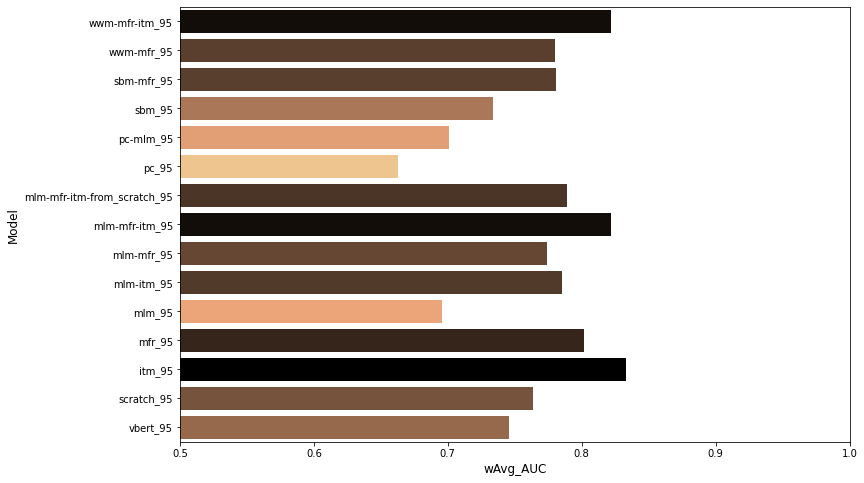

In [121]:
# Bar chart of all
import seaborn as sns
norm = plt.Normalize(image_95_df.wAvg_AUC.values.min(), image_95_df.wAvg_AUC.values.max())
colors = plt.cm.copper_r(norm(image_95_df.wAvg_AUC))

plt.figure(figsize=(12,8))
sns.barplot(y="name", x="wAvg_AUC", data=image_95_df, palette=colors)
plt.xlabel('wAvg_AUC', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xticks()
plt.xlim((0.5,1))
plt.show()

In [20]:
import pickle

with open('sample_input.pkl','rb') as f: inp = pickle.load(f)

# Visualise attention head

from transformers import AutoTokenizer, AutoModel, utils
from bertviz import model_view, head_view
utils.logging.set_verbosity_error()  # Suppress standard warnings

model_name = "/media/matt/data21/mmRad/checkpoints/PT/mlm/encoder"  # Find popular HuggingFace models here: https://huggingface.co/models
# input_text = "The cat sat on the mat"  
model = AutoModel.from_pretrained(model_name, output_attentions=True)  # Configure model to return attention values
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
# # inputs = tokenizer.encode(input_text, return_tensors='pt')  # Tokenize input text
# outputs = model(inputs)  # Run model
# attention = outputs[-1]  # Retrieve attention from model outputs
# tokens = tokenizer.convert_ids_to_tokens(inputs[0])  # Convert input ids to token strings
# model_view(attention, tokens)  # Display model view


In [21]:

outputs_single = model(
    input_ids=inp['input_ids'][2].unsqueeze(dim=0).cpu(),
    # attention_mask=inp['txt']['att_mask'],
    visual_embeds=inp['visual_embeds'][2].unsqueeze(dim=0).cpu()
    )
attention = outputs_single[-1]  # Retrieve attention from model outputs
tokens = tokenizer.convert_ids_to_tokens(inp['input_ids'][2])  # Convert input ids to token strings
tokens += ['VTOK_'+str(i) for i in range(36)]

In [7]:
attention[-1].shape

torch.Size([1, 12, 161, 161])

In [29]:
model_view(attention, tokens, include_heads=[0,3,7,11], include_layers=[11])  # Display model view

<IPython.core.display.Javascript object>

--------

In [35]:
# import pickle

# with open('sample_input.pkl','rb') as f: inp = pickle.load(f)

# # Visualise attention head

# from transformers import AutoTokenizer, AutoModel, utils
# from bertviz import model_view, head_view
# utils.logging.set_verbosity_error()  # Suppress standard warnings

model_name = "/media/matt/data21/mmRad/checkpoints/PT/mfr/encoder"  # Find popular HuggingFace models here: https://huggingface.co/models
# input_text = "The cat sat on the mat"  
model2 = AutoModel.from_pretrained(model_name, output_attentions=True)  # Configure model to return attention values

In [36]:
outputs_single2 = model2(
    input_ids=inp['input_ids'][2].unsqueeze(dim=0).cpu(),
    # attention_mask=inp['txt']['att_mask'],
    visual_embeds=inp['visual_embeds'][2].unsqueeze(dim=0).cpu()
    )
attention2 = outputs_single2[-1]  # Retrieve attention from model outputs
# tokens2 = tokenizer.convert_ids_to_tokens(inp['input_ids'][2])  # Convert input ids to token strings
# tokens2 += ['VTOK_'+str(i) for i in range(36)]

In [38]:
model_view(attention2, tokens, include_heads=[0,3,7,11], include_layers=[0])  # Display model view

<IPython.core.display.Javascript object>